In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt 
import seaborn as sns
from kalmanfilter import OptimizedKalmanFilter

sns.set_theme(style='darkgrid')

In [2]:
df_ufi = pd.read_csv('us_financial_indices_2021.csv').assign(
    DATE=lambda d: pd.to_datetime(d.DATE)
).set_index('DATE')
df_ufi

,DJIA,SP500,NASDAQ100
DATE,,,
2021-01-04,30223.89,3700.65,12694.66
2021-01-05,30391.60,3726.86,12802.38
2021-01-06,30829.40,3748.14,12623.35
2021-01-07,31041.13,3803.79,12939.57
2021-01-08,31097.97,3824.68,13105.20
...,...,...,...
2021-12-27,36302.38,4791.19,16567.50
2021-12-28,36398.21,4786.35,16488.66
2021-12-29,36488.63,4793.06,16491.01


In [3]:
lr_sp500 = np.log(df_ufi.SP500).diff().iloc[1:].ewm(span=6).mean()
okf = OptimizedKalmanFilter(y=lr_sp500, keep_history=False)
df_fit = okf.filter(x0=0)
df_fit

,y,x,v
DATE,,,
2021-01-05,0.007058,0.005376,0.000007
2021-01-06,0.006262,0.006037,0.000007
2021-01-07,0.010072,0.009044,0.000007
2021-01-08,0.008297,0.008488,0.000007
2021-01-11,0.003077,0.004457,0.000007
...,...,...,...
2021-12-27,0.007078,0.006284,0.000007
2021-12-28,0.004767,0.005154,0.000007
2021-12-29,0.003805,0.004149,0.000007


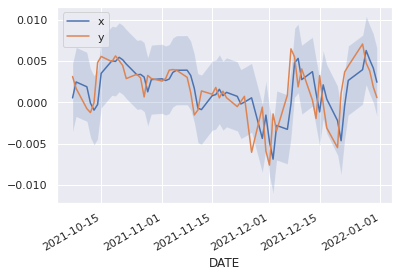

In [4]:
df_plt = df_fit.assign(x=lambda d: d.x.shift(), v= lambda d: d.v.shift()).tail(60)
df_plt[['x', 'y']].plot.line()
ci = norm.interval(alpha=0.9, loc=df_plt.x, scale=np.sqrt(df_plt.v)) 
plt.fill_between(df_plt.index, *ci, alpha=0.2)